Get all units for each timestamp. Load files and convert units as required.

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pickle
import os
import pandas as pd
units_overview = {


    "default_units": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "mm",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "SuckbackPositionLS10": "mm",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "unique_units": {


        "BackPress": ["psi", "PSI"],


        "ChargingCompletionPositionLS5": ["in", "inch", "mm"],


        "Chargingenergy": ["J"],


        "Chargingstartposition": ["inch", "mm"],


        "ChargingTime": ["sec"],


        "Chargingtorque": ["%"],


        "CushionPos": ["inch", "mm"],


        "FPCPositionLS3": ["in", "inch", "mm"],


        "Holdingchangeposition": ["inch", "mm"],


        "Holdingenergy": ["J"],


        "Injectionstartposition": ["inch", "mm"],


        "Injectionstroke": ["inch", "mm"],


        "SuckbackPositionLS10": ["inch", "mm"],


        "Pressureforholdingchange": ["psi", "PSI"],


        "ScrewRotationSpd": ["rpm"],


    },


    "8316-02": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "inch",


    },


    "8000-08": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8463-01": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "7075-03": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "in",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "8316-04": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "inch",


    },


    "8000-18": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "7859-08": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "mm",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "SuckbackPositionLS10": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


    },


    "8166-01": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "7415-01": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8137-03": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "8137-02": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "7415-03": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8137-07": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "8151-04": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "inch",


    },


    "8215-01": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "inch",


    },


    "8303-02": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "SuckbackPositionLS10": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


    },


    "7859-05": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "mm",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "SuckbackPositionLS10": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


    },


    "8000-01": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-15": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-03": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-17": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8316-09": {


        "BackPress": "psi",


        "ChargingCompletionPositionLS5": "inch",


        "Chargingenergy": "J",
        "Chargingstartposition": "inch",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "inch",


        "FPCPositionLS3": "inch",


        "Holdingchangeposition": "inch",


        "Holdingenergy": "J",


        "Injectionstartposition": "inch",


        "Injectionstroke": "inch",


        "Pressureforholdingchange": "psi",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "inch",


    },


    "8000-16": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-02": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-06": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-12": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "7859-03": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "mm",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "SuckbackPositionLS10": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


    },


    "8000-13": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-07": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-11": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "8000-05": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


    "7859-01": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "mm",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "SuckbackPositionLS10": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


    },


    "8000-10": {


        "BackPress": "PSI",


        "ChargingCompletionPositionLS5": "mm",


        "Chargingenergy": "J",
        "Chargingstartposition": "mm",


        "ChargingTime": "sec",


        "Chargingtorque": "%",


        "CushionPos": "mm",


        "FPCPositionLS3": "in",


        "Holdingchangeposition": "mm",


        "Holdingenergy": "J",


        "Injectionstartposition": "mm",


        "Injectionstroke": "mm",


        "Pressureforholdingchange": "PSI",


        "ScrewRotationSpd": "rpm",


        "SuckbackPositionLS10": "mm",


    },


}


INCHES_TO_MM = 25.4


def read_df(fn: str, add_project_name: bool = True) -> pd.DataFrame:
    try:
        df = pd.read_csv(fn)
        project_name = os.path.basename(fn).split(".")[0]
        print(project_name)
        for tag, unit in units_overview[project_name].items():
            if unit.lower() == "inch" or unit.lower() == "in":
                df.loc[:, tag] = df.loc[:, tag] * INCHES_TO_MM
        if add_project_name:
            df.loc[:, "project_name"] = project_name
        return df
    except Exception as e:
        print(e)
        print(f"Couldn't change units for: {project_name}")
        return pd.DataFrame()
    

df = pd.DataFrame()
dir = 'shibaura_data'
fns = os.listdir(dir)
for fn in fns:
    cur_df = read_df(os.path.join(dir, fn))
    df = pd.concat([df, cur_df], ignore_index=False)

df = df.drop('CurrentDateTime', axis=1)
df = df.drop('project_name', axis=1)



7415-01
7415-03
7859-08
8000-03
8000-07
8000-08
8000-10
8000-11
8000-12
8000-13
8000-15
8000-16
8000-17
8000-18
8137-02
8137-03
8137-07
8151-04
8166-01
8215-01
8303-02
8316-02
8316-04
8316-09
8463-01


Data Exploration

In [3]:
df.head
df.columns
# len(df)

print(f"row with any nans {df.isnull().any(axis=1).sum()}")
print(f"row with all nanas {df.isnull().all(axis=1).sum()}")

row with any nans 12156796
row with all nanas 4560154


Drop rows with all nans, and fill rows with some nans with the mean of the column.

In [4]:
df = df.dropna(how='all')
df = df.fillna(df.mean())
df = df.reset_index(drop=True)


Choose columns to investigate their relationships. Filter to remove outliers by quantile.

In [5]:

cols = ['Holdingchangeposition',
        'FPCPositionLS3',
        'Pressureforholdingchange',
        'Holdingenergy',
        'Injectionstartposition',
        'Injectionstroke',
        'CushionPos',
        'BackPress',
        'Chargingenergy',
        'ChargingCompletionPositionLS5',
        'SuckbackPositionLS10',
        'Chargingstartposition',
        'Chargingtorque',
        'ScrewRotationSpd',
        'ChargingTime']

# cols = ['BackPress', 'Injectionstroke',"ChargingTime"]
# cols = ["ScrewRotationSpd", "Injectionstroke",
#         "CushionPos", "BackPress", "ChargingTime", "Chargingstartposition"]

# cols = ["ChargingCompletionPositionLS5", "FPCPositionLS3",
#         "CushionPos", "BackPress", "ChargingTime"]


df_filt = df.loc[:, cols]

for c in df_filt.columns:
    upper_q = df[c].quantile(0.99)
    lower_q = df[c].quantile(0.01)
    df_filt = df_filt[(df_filt[c] <= upper_q) & (lower_q <= df_filt[c])]

#     plt.plot(df_filt[c])

In [6]:
np.mean(df_filt, axis = 0)

Holdingchangeposition                13.917843
FPCPositionLS3                       80.940041
Pressureforholdingchange           6931.327503
Holdingenergy                      1788.443363
Injectionstartposition              107.451873
Injectionstroke                     100.658980
CushionPos                            6.792594
BackPress                           635.172980
Chargingenergy                   138766.822189
ChargingCompletionPositionLS5        80.189983
SuckbackPositionLS10                  8.249152
Chargingstartposition                 9.012717
Chargingtorque                       75.505041
ScrewRotationSpd                     66.173063
ChargingTime                         14.657647
dtype: float64

Split into training and testing material.

In [7]:
ratio = 0.8
response_var = "ChargingTime"

idx = math.floor(len(df_filt)*ratio)
train, test = df_filt.iloc[:idx], df_filt.iloc[idx:]
trainX, trainY = train.drop(response_var, axis=1), train[response_var]
testX, testY = test.drop(response_var, axis=1), test[response_var]
print(f"train X shape: {trainX.shape}, train Y shape: {trainY.shape}")
print(f"test X shape: {testX.shape}, test Y shape: {testY.shape}")

train X shape: (6094040, 14), train Y shape: (6094040,)
test X shape: (1523510, 14), test Y shape: (1523510,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error    
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math

In [9]:
# model = DecisionTreeRegressor(max_depth= 4)
model = RandomForestRegressor(n_estimators=10, verbose = 2, max_depth = 5)
m = model.fit(trainX, trainY)


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


In [10]:
print(f"train r2 : {model.score(trainX,trainY)}")
print(f"test r2: {model.score(testX,testY)}")

model.get_params

train r2 : 0.9642039238821041
test r2: 0.7709269742655657


<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=5, n_estimators=10, verbose=2)>

Visualising the first decision tree in the forest.

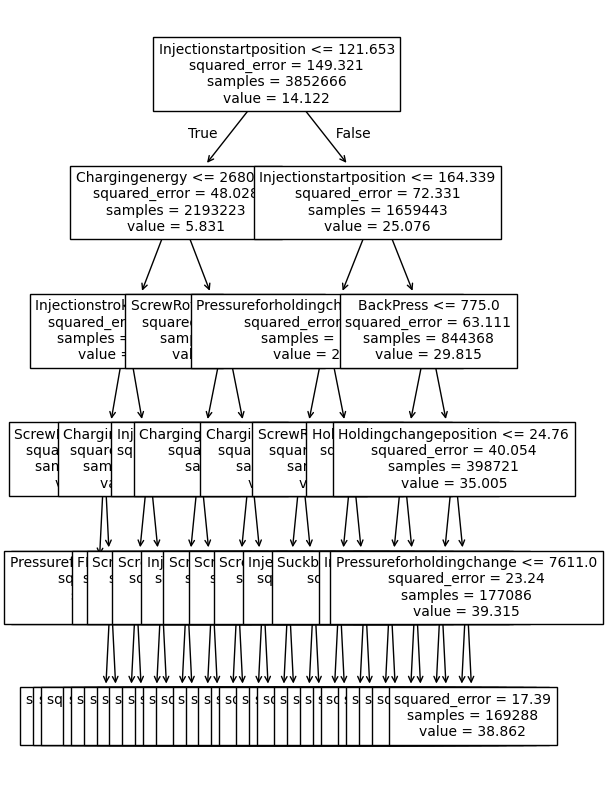

In [11]:
plt.figure(figsize= (5,10))
plot_tree(model.estimators_[0], feature_names= trainX.columns, fontsize=10)
plt.show()

Getting metrics for the model.

In [12]:
trainpredY = model.predict(trainX)
print(f" RMSE/mean for train {np.sqrt(mean_squared_error(trainY ,trainpredY))/ np.mean(trainY)}")
print(
    f" RMSE/median for train {np.sqrt(mean_squared_error(trainY ,trainpredY))/ np.median(trainY)}")

testpredY = model.predict(testX)
rmse_mean = np.sqrt(mean_squared_error(testY ,testpredY))/ np.mean(testY)
rmse_median = np.sqrt(mean_squared_error(testY ,testpredY))/ np.median(testY)
print(
    f" RMSE/mean for test {rmse_mean}")
print(
    f" RMSE/median for test {rmse_median}")

r2 = r2_score(testY, testpredY)

 RMSE/mean for train 0.1637152694530489
 RMSE/median for train 0.19278997478884108
 RMSE/mean for test 0.50047717130644
 RMSE/median for test 0.8524272636323439


Visualising feature importances and prediction outputs.

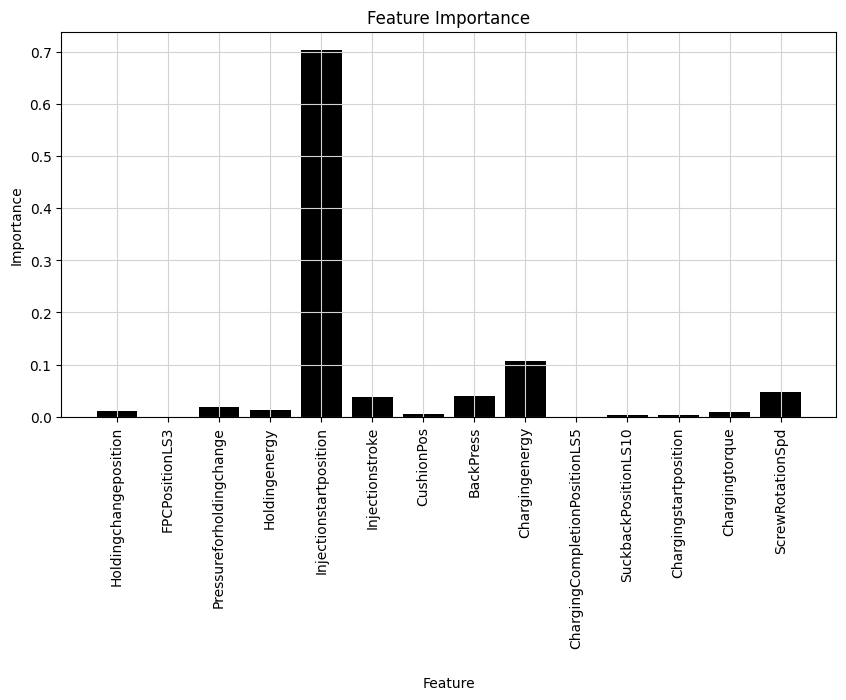

In [13]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.bar(trainX.columns, model.feature_importances_ , color = 'black')
plt.title('Feature Importance')
plt.xlabel('Feature', labelpad= 20)
plt.ylabel('Importance')

plt.grid(True, color='lightgray')

(7617550,) (7617550,)


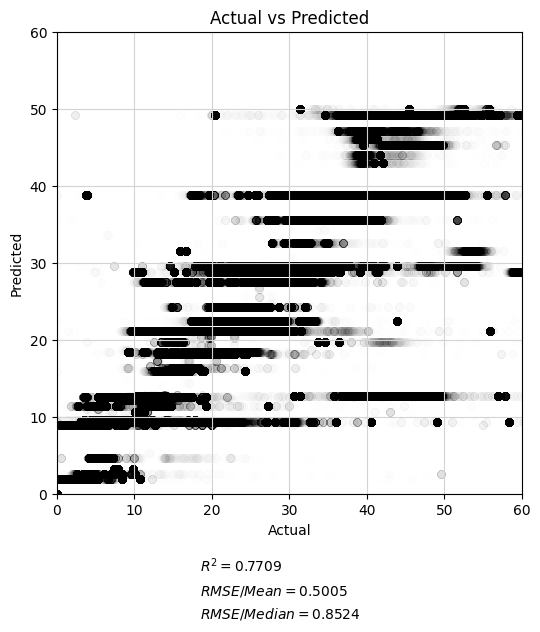

In [14]:
# fig, ax = plt.subplots(2,2, figsize = (10,8))

# ax[0, 0].plot(trainpredY)
# ax[0,0].set_title("Predicted on Training")
# ax[0, 1].plot(testpredY)
# ax[0, 1].set_title("Predicted on Testing")
# ax[1, 0].plot(trainY)
# ax[1, 0].set_title("Actual Training")
# ax[1, 1].plot(testY)
# ax[1, 1].set_title("Actual Testing")

# plt.figure(0, figsize=(6,6))
# plt.scatter(trainY, trainpredY, alpha=0.02)

x = np.concatenate((testY, trainY))
y = np.concatenate((testpredY,trainpredY))

print(x.shape, y.shape)
plt.figure(1, figsize=(6, 6))
plt.scatter(x, y, alpha=0.004, color = 'black')
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.text(18.5, -10.15, rf'$R^2 = {r2: .4f}$' )
plt.text(18.5, -13.15, rf'$RMSE/Mean = {rmse_mean:.4f} $' )
plt.text(18.5, -16.15, rf'$RMSE/Median = {rmse_median:.4f}$')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True, color='lightgray')

In [15]:

params = {'max_depth': list(range(2, 8,2)),
          'n_estimators': list(range(10,100,20)),
          'criterion': ['squared_error'],
          }

# dtm = DecisionTreeRegressor()
dtm = RandomForestRegressor()
dtm_gscv = GridSearchCV(dtm, params, cv = 5)
dtm_gscv.fit(trainX, trainY)
model_tuned = dtm_gscv.best_params_
print(model_tuned)